In [36]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import pydotplus
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Import training and testing data
full = pd.read_csv('./data/full.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Drop the target column from the training data
X_train = train.drop('Result', axis=1)
Y_train = train['Result']

# Drop the target column from the testing data
X_test = test.drop('Result', axis=1)
Y_test = test['Result']

X_full = full.drop('Result', axis=1)
Y_full = full['Result']

In [59]:
# Define function to do k-fold cross validation

def k_fold_cross_validation(k, data, labels, criterion, max_depth):
    kfold = KFold(n_splits=k, shuffle=True, random_state=7)

    k_accuracy_val = []

    for fold, (train_index, val_index) in enumerate(kfold.split(data)):

        X_train_fold = data.iloc[train_index]
        Y_train_fold = labels.iloc[train_index]
        X_val_fold = data.iloc[val_index]
        Y_val_fold = labels.iloc[val_index]

        clf = DecisionTreeClassifier(random_state=7, criterion=criterion, max_depth=max_depth)
        clf.fit(X_train_fold, Y_train_fold)

        k_accuracy_val.append(clf.score(X_val_fold, Y_val_fold))
    
    return k_accuracy_val

def plot_heatmap(data, title):

    pivot_table = pd.pivot_table(data, values='Accuracy', index='Criterion', columns='Max Depth')

    # Plotting the heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)



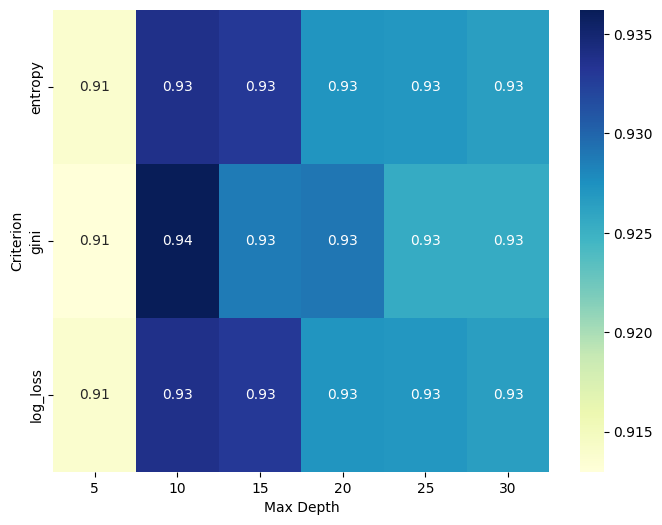

In [60]:
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [5, 10, 15, 20, 25, 30]

param1 = []
param2 = []
accuracy = []

for i, cr in enumerate(criterion):
    for j, dep in enumerate(max_depth):

        test_accuracy = k_fold_cross_validation(5, X_full, Y_full, cr, dep)

        for i in range(len(test_accuracy)):
            param1.append(cr)
            param2.append(dep)
            accuracy.append(test_accuracy[i])


data = {
    'Criterion': param1,
    'Max Depth': param2,
    'Accuracy': accuracy,
}

result = pd.DataFrame(data)

plot_heatmap(result, 'Accuracy vs Criterion and Max Depth')

In [70]:
# Training the model (Gini)
clf = DecisionTreeClassifier(random_state=7, criterion='gini', max_depth=10)

clf.fit(X_train, Y_train)

# Testing the model
accuracy = clf.score(X_test, Y_test)

print(accuracy)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("./data/tree_gini.pdf")


0.9324786324786325


True